# EDA AIR QUALITY
---
`En este cuadernillo se realiza el análisis exploratorio del dataset 'air_quality.parquet'`

### Importación de librerías
---

*Para este cuaderno usaremos las siguientes librerías: **pandas y pyarrow**.*

In [3]:
import pandas as pd
import pyarrow.parquet as pq
import geopandas as gpd
import matplotlib.pyplot as plt

#### **Web Scraping / Extracción de los datos** ####
---

*Para este cuaderno usaremos los datos procesados en el EDA inicial*

In [42]:
ruta_archivo = '../datasets/processed/air_quality.parquet'

# Se abre el archivo parquet
tabla_parquet = pq.read_table(ruta_archivo)

# Se convierte a dataframe de pandas
air_quality = tabla_parquet.to_pandas()

In [30]:
air_quality.head()

,geo_place_name,geo_type_name,start_date,indicator_id,name,measure,measure_info,data_value,unique_id,geo_join_id
0,Pelham - Throgs Neck,UHF34,2022-06-01,386,Ozone (O3),Mean,ppb,33.3,827080,104
1,Ridgewood - Forest Hills,UHF34,2022-06-01,386,Ozone (O3),Mean,ppb,34.2,827061,405
2,Central Harlem - Morningside Heights,UHF34,2022-06-01,386,Ozone (O3),Mean,ppb,30.9,827067,302
3,Fordham - Bronx Pk,UHF34,2022-06-01,386,Ozone (O3),Mean,ppb,31.7,827081,103
4,Pelham - Throgs Neck,UHF34,2022-06-01,375,Nitrogen dioxide (NO2),Mean,ppb,12.0,825967,104


In [43]:
air_quality = air_quality.rename(columns={"name": "Contaminante", "geo_type_name": "Division", "geo_join_id": "IdLoc",
                                          "geo_place_name": "NombreLugar",  "start_date": "FechaInicio"})

In [32]:
air_quality['Division'].unique()

array(['UHF34', 'UHF42', 'CD', 'Borough', 'Citywide'], dtype=object)

In [44]:
#division: nos interesa 'CD': communitydistrict y 'borough': distrito

air_quality_borough =  air_quality[air_quality['Division'] == 'Borough']

air_quality_cd = air_quality[air_quality['Division'] == 'CD']

## Calidad del aire por bourough (Distrito)

In [45]:
# Calidad del aire por Bourough (Distrito)
air_quality_borough

,NombreLugar,Division,FechaInicio,indicator_id,Contaminante,measure,measure_info,data_value,unique_id,IdLoc
30,Staten Island,Borough,2022-06-01,375,Nitrogen dioxide (NO2),Mean,ppb,7.8,825799,5
45,Manhattan,Borough,2022-06-01,386,Ozone (O3),Mean,ppb,30.2,827146,3
73,Queens,Borough,2022-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,6.4,823331,4
98,Brooklyn,Borough,2022-06-01,375,Nitrogen dioxide (NO2),Mean,ppb,10.7,825808,2
101,Manhattan,Borough,2022-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,7.5,823334,3
...,...,...,...,...,...,...,...,...,...,...
16187,Queens,Borough,2009-01-01,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",4.2,151621,4
16189,Brooklyn,Borough,2009-01-01,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",48.5,131407,2
16198,Queens,Borough,2009-01-01,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",11.4,131553,4
16213,Bronx,Borough,2009-01-01,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",55.0,131598,1


In [46]:
air_quality_borough['Año'] = air_quality_borough['FechaInicio'].dt.year
air_quality_borough.drop(['Division'], axis=1, inplace=True)
air_quality_borough

C:\Users\cquir\AppData\Local\Temp\ipykernel_2948\3618669438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_borough['Año'] = air_quality_borough['FechaInicio'].dt.year
C:\Users\cquir\AppData\Local\Temp\ipykernel_2948\3618669438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_borough.drop(['Division'], axis=1, inplace=True)


,NombreLugar,FechaInicio,indicator_id,Contaminante,measure,measure_info,data_value,unique_id,IdLoc,Año
30,Staten Island,2022-06-01,375,Nitrogen dioxide (NO2),Mean,ppb,7.8,825799,5,2022
45,Manhattan,2022-06-01,386,Ozone (O3),Mean,ppb,30.2,827146,3,2022
73,Queens,2022-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,6.4,823331,4,2022
98,Brooklyn,2022-06-01,375,Nitrogen dioxide (NO2),Mean,ppb,10.7,825808,2,2022
101,Manhattan,2022-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,7.5,823334,3,2022
...,...,...,...,...,...,...,...,...,...,...
16187,Queens,2009-01-01,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",4.2,151621,4,2009
16189,Brooklyn,2009-01-01,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",48.5,131407,2,2009
16198,Queens,2009-01-01,650,Respiratory hospitalizations due to PM2.5 (age...,Estimated annual rate,"per 100,000 adults",11.4,131553,4,2009
16213,Bronx,2009-01-01,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",55.0,131598,1,2009


In [47]:
columnas_eliminar1 = ['NombreLugar', 'indicator_id', 'measure', 'unique_id']
air_quality_borough.drop(columns=columnas_eliminar1, axis=1, inplace=True)
air_quality_borough

C:\Users\cquir\AppData\Local\Temp\ipykernel_2948\2379229731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_borough.drop(columns=columnas_eliminar1, axis=1, inplace=True)


,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
30,2022-06-01,Nitrogen dioxide (NO2),ppb,7.8,5,2022
45,2022-06-01,Ozone (O3),ppb,30.2,3,2022
73,2022-06-01,Fine particles (PM 2.5),mcg/m3,6.4,4,2022
98,2022-06-01,Nitrogen dioxide (NO2),ppb,10.7,2,2022
101,2022-06-01,Fine particles (PM 2.5),mcg/m3,7.5,3,2022
...,...,...,...,...,...,...
16187,2009-01-01,Asthma hospitalizations due to Ozone,"per 100,000 adults",4.2,4,2009
16189,2009-01-01,Asthma emergency department visits due to PM2.5,"per 100,000 adults",48.5,2,2009
16198,2009-01-01,Respiratory hospitalizations due to PM2.5 (age...,"per 100,000 adults",11.4,4,2009
16213,2009-01-01,Deaths due to PM2.5,"per 100,000 adults",55.0,1,2009


In [48]:
air_quality_borough_mcgm3 = air_quality_borough[air_quality_borough['measure_info'] == 'mcg/m3']
air_quality_borough_mcgm3

,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
73,2022-06-01,Fine particles (PM 2.5),mcg/m3,6.4,4,2022
101,2022-06-01,Fine particles (PM 2.5),mcg/m3,7.5,3,2022
381,2022-06-01,Fine particles (PM 2.5),mcg/m3,6.3,2,2022
384,2022-06-01,Fine particles (PM 2.5),mcg/m3,7.1,1,2022
402,2022-06-01,Fine particles (PM 2.5),mcg/m3,5.8,5,2022
...,...,...,...,...,...,...
15626,2009-06-01,Fine particles (PM 2.5),mcg/m3,10.5,5,2009
15790,2009-06-01,Fine particles (PM 2.5),mcg/m3,10.9,2,2009
15910,2009-06-01,Fine particles (PM 2.5),mcg/m3,10.3,4,2009
15923,2009-06-01,Fine particles (PM 2.5),mcg/m3,10.7,1,2009


In [50]:
# Nos interesa el año 2021
air_quality_borough_mcgm3_2021 = air_quality_borough_mcgm3[air_quality_borough_mcgm3['Año'] == 2021]
air_quality_borough_mcgm3_2021

,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
751,2021-12-01,Fine particles (PM 2.5),mcg/m3,6.1,5,2021
758,2021-12-01,Fine particles (PM 2.5),mcg/m3,6.7,4,2021
791,2021-12-01,Fine particles (PM 2.5),mcg/m3,6.9,2,2021
821,2021-12-01,Fine particles (PM 2.5),mcg/m3,7.9,3,2021
871,2021-12-01,Fine particles (PM 2.5),mcg/m3,7.3,1,2021
1014,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.1,4,2021
1103,2021-06-01,Fine particles (PM 2.5),mcg/m3,9.4,3,2021
1114,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.6,1,2021
1158,2021-06-01,Fine particles (PM 2.5),mcg/m3,7.9,5,2021
1376,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.5,2,2021


In [51]:
# Nos interesa el periodo Verano de 2021
air_quality_borough_mcgm3_2021_verano = air_quality_borough_mcgm3_2021[air_quality_borough_mcgm3_2021['FechaInicio'] == '2021-06-01']
air_quality_borough_mcgm3_2021_verano

,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
1014,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.1,4,2021
1103,2021-06-01,Fine particles (PM 2.5),mcg/m3,9.4,3,2021
1114,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.6,1,2021
1158,2021-06-01,Fine particles (PM 2.5),mcg/m3,7.9,5,2021
1376,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.5,2,2021


In [53]:
# Mapeamos los id de los boroughs para que coincidan con los id oficiales de los boroughs de NYC.
mapeo_borough = {
    "1": 2,
    "2": 3,
    "3": 1,
    "4": 4,
    "5": 5
}
air_quality_borough_mcgm3_2021_verano["IdLoc"] = air_quality_borough_mcgm3_2021_verano["IdLoc"].replace(mapeo_borough)
air_quality_borough_mcgm3_2021_verano

C:\Users\cquir\AppData\Local\Temp\ipykernel_2948\1952998081.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_borough_mcgm3_2021_verano["IdLoc"] = air_quality_borough_mcgm3_2021_verano["IdLoc"].replace(mapeo_borough)


,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
1014,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.1,4,2021
1103,2021-06-01,Fine particles (PM 2.5),mcg/m3,9.4,1,2021
1114,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.6,2,2021
1158,2021-06-01,Fine particles (PM 2.5),mcg/m3,7.9,5,2021
1376,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.5,3,2021


In [67]:
# Ruta al archivo TopoJSON
file_path = "../datasets/processed/Boroughs.topojson"

# Lee el archivo TopoJSON
boroughs1 = gpd.read_file(file_path)
boroughs1 = boroughs1.rename(columns={'IdBorough': 'IdLoc'})
boroughs1

,id,IdLoc,Area,Perimetro,geometry
0,None,5,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,None,1,6.365205e+08,357713.308162,"MULTIPOLYGON (((-74.00953 40.68534, -74.01093 ..."
2,None,2,1.187175e+09,463180.579449,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,None,3,1.934138e+09,728146.574928,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,4,3.041419e+09,888199.731385,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


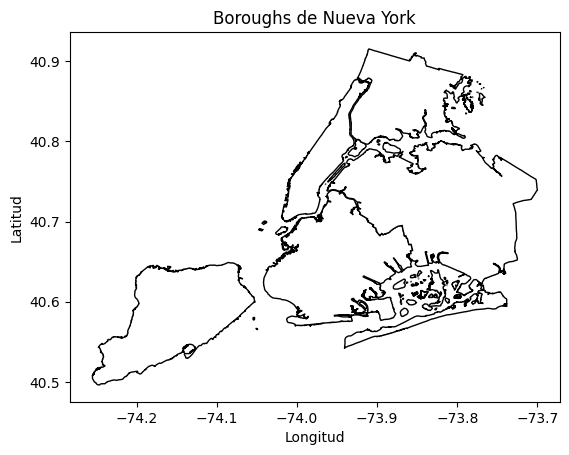

In [68]:
# Crea una figura y ejes
fig, ax = plt.subplots()

# Grafica los datos geoespaciales
boroughs1.plot(ax=ax, color='white', edgecolor='black')

# Añade título y etiquetas
ax.set_title('Boroughs de Nueva York')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Muestra el mapa
plt.show()

### Visualizacion Calidad Aire por Distrito (Bourough) para el período Verano 2021

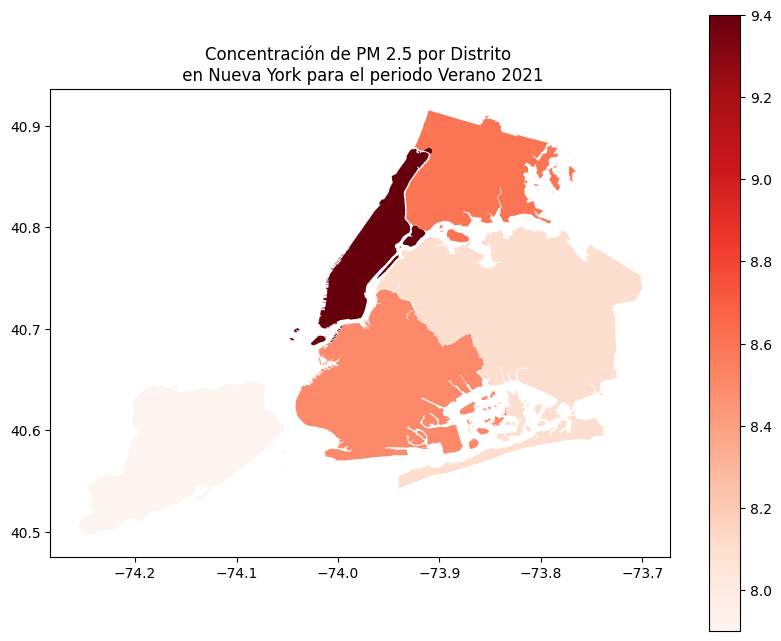

In [118]:
# Combinamos ambos dataframes Borough y air_quality_borough_mcgm3_2021_verano


# Fusionar los datos geoespaciales con los datos de concentración utilizando 'IdCD'
borough_concentracion_contaminante2021 = pd.merge(boroughs1, air_quality_borough_mcgm3_2021_verano, on="IdLoc")

# Crear un mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))
borough_concentracion_contaminante2021.plot(column="data_value", cmap="Reds", ax=ax, legend=True)
ax.set_title('Concentración de PM 2.5 por Distrito \n en Nueva York para el periodo Verano 2021')
plt.show()

### Por otro lado nos interesa tambien el año 2020

In [54]:
# Nos interesa el año 2020
air_quality_borough_mcgm3_2020 = air_quality_borough_mcgm3[air_quality_borough_mcgm3['Año'] == 2020]
air_quality_borough_mcgm3_2020

,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
1713,2020-12-01,Fine particles (PM 2.5),mcg/m3,6.5,5,2020
1852,2020-12-01,Fine particles (PM 2.5),mcg/m3,6.6,1,2020
1872,2020-12-01,Fine particles (PM 2.5),mcg/m3,6.9,2,2020
1880,2020-12-01,Fine particles (PM 2.5),mcg/m3,6.7,4,2020
1964,2020-12-01,Fine particles (PM 2.5),mcg/m3,7.5,3,2020
2066,2020-06-01,Fine particles (PM 2.5),mcg/m3,6.6,5,2020
2081,2020-06-01,Fine particles (PM 2.5),mcg/m3,7.2,1,2020
2253,2020-06-01,Fine particles (PM 2.5),mcg/m3,7.8,3,2020
2300,2020-06-01,Fine particles (PM 2.5),mcg/m3,6.9,2,2020
2375,2020-06-01,Fine particles (PM 2.5),mcg/m3,6.9,4,2020


In [55]:
# Nos interesa el periodo Verano de 2020
air_quality_borough_mcgm3_2020_verano = air_quality_borough_mcgm3_2020[air_quality_borough_mcgm3_2020['FechaInicio'] == '2020-06-01']
air_quality_borough_mcgm3_2020_verano

,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
2066,2020-06-01,Fine particles (PM 2.5),mcg/m3,6.6,5,2020
2081,2020-06-01,Fine particles (PM 2.5),mcg/m3,7.2,1,2020
2253,2020-06-01,Fine particles (PM 2.5),mcg/m3,7.8,3,2020
2300,2020-06-01,Fine particles (PM 2.5),mcg/m3,6.9,2,2020
2375,2020-06-01,Fine particles (PM 2.5),mcg/m3,6.9,4,2020


In [56]:
# Mapeamos los id de los boroughs para que coincidan con los id oficiales de los boroughs de NYC.
mapeo_borough = {
    "1": 2,
    "2": 3,
    "3": 1,
    "4": 4,
    "5": 5
}
air_quality_borough_mcgm3_2020_verano["IdLoc"] = air_quality_borough_mcgm3_2020_verano["IdLoc"].replace(mapeo_borough)
air_quality_borough_mcgm3_2020_verano

C:\Users\cquir\AppData\Local\Temp\ipykernel_2948\2027688897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_borough_mcgm3_2020_verano["IdLoc"] = air_quality_borough_mcgm3_2020_verano["IdLoc"].replace(mapeo_borough)


,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
2066,2020-06-01,Fine particles (PM 2.5),mcg/m3,6.6,5,2020
2081,2020-06-01,Fine particles (PM 2.5),mcg/m3,7.2,2,2020
2253,2020-06-01,Fine particles (PM 2.5),mcg/m3,7.8,1,2020
2300,2020-06-01,Fine particles (PM 2.5),mcg/m3,6.9,3,2020
2375,2020-06-01,Fine particles (PM 2.5),mcg/m3,6.9,4,2020


In [65]:
# Ruta al archivo TopoJSON
file_path = "../datasets/processed/Boroughs.topojson"

# Lee el archivo TopoJSON
boroughs2 = gpd.read_file(file_path)
boroughs2 = boroughs2.rename(columns={'IdBorough': 'IdLoc'})
boroughs2

,id,IdLoc,Area,Perimetro,geometry
0,None,5,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,None,1,6.365205e+08,357713.308162,"MULTIPOLYGON (((-74.00953 40.68534, -74.01093 ..."
2,None,2,1.187175e+09,463180.579449,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,None,3,1.934138e+09,728146.574928,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,4,3.041419e+09,888199.731385,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


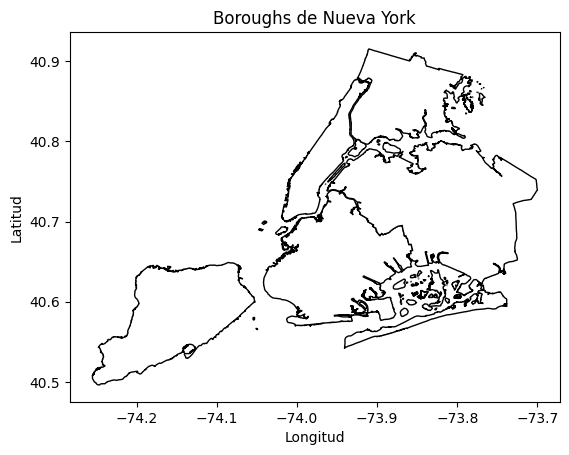

In [69]:
# Crea una figura y ejes
fig, ax = plt.subplots()

# Grafica los datos geoespaciales
boroughs.plot(ax=ax, color='white', edgecolor='black')

# Añade título y etiquetas
ax.set_title('Boroughs de Nueva York')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Muestra el mapa
plt.show()

### Visualizacion Calidad Aire por Distrito (Bourough) para el período Verano 2020

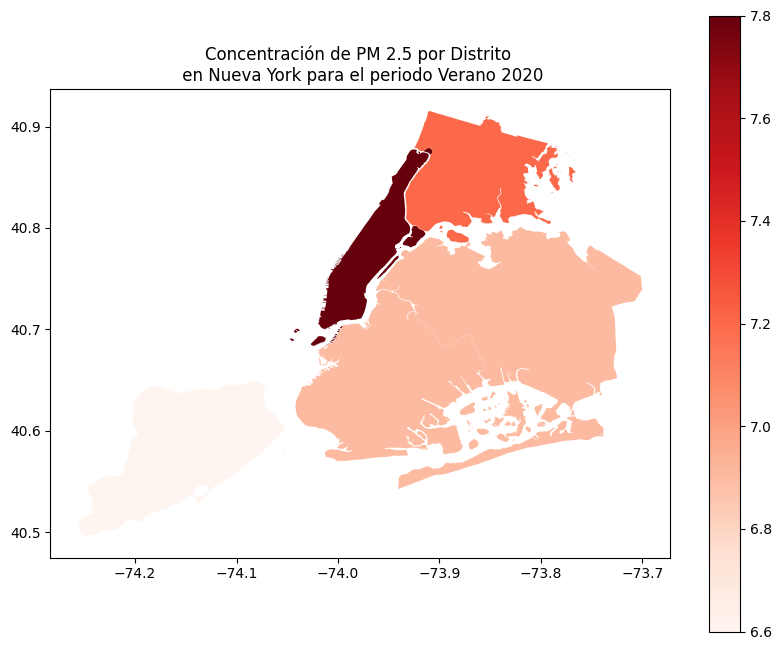

In [117]:
# Combinamos ambos dataframes Borough y air_quality_borough_mcgm3_2020_verano


# Fusionar los datos geoespaciales con los datos de concentración utilizando 'IdCD'
borough_concentracion_contaminante = pd.merge(boroughs2, air_quality_borough_mcgm3_2020_verano, on="IdLoc")

# Crear un mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))
borough_concentracion_contaminante.plot(column="data_value", cmap="Reds", ax=ax, legend=True)
ax.set_title('Concentración de PM 2.5 por Distrito \n en Nueva York para el periodo Verano 2020')
plt.show()

---

### Calidad del aire por CommunityDistrict (barrios)

In [82]:
#usamos el dataframe creado con anterioridad
air_quality_cd

,NombreLugar,Division,FechaInicio,indicator_id,Contaminante,measure,measure_info,data_value,unique_id,IdLoc
10,Jamaica and Hollis (CD12),CD,2022-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,6.3,823561,412
11,Clinton and Chelsea (CD4),CD,2022-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,8.0,823214,104
12,Rockaway and Broad Channel (CD14),CD,2022-06-01,375,Nitrogen dioxide (NO2),Mean,ppb,6.9,826076,414
14,Upper West Side (CD7),CD,2022-06-01,375,Nitrogen dioxide (NO2),Mean,ppb,14.7,825831,107
20,Coney Island (CD13),CD,2022-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,5.8,823510,313
...,...,...,...,...,...,...,...,...,...,...
16072,Greenwich Village and Soho (CD2),CD,2009-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,13.0,169280,102
16073,Brownsville (CD16),CD,2009-06-01,375,Nitrogen dioxide (NO2),Mean,ppb,21.6,166663,316
16076,Hunts Point and Longwood (CD2),CD,2009-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,11.5,169292,202
16078,Belmont and East Tremont (CD6),CD,2009-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,11.1,169296,206


In [83]:
air_quality_cd['Año'] = air_quality_cd['FechaInicio'].dt.year
air_quality_cd

C:\Users\cquir\AppData\Local\Temp\ipykernel_2948\489119933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_cd['Año'] = air_quality_cd['FechaInicio'].dt.year


,NombreLugar,Division,FechaInicio,indicator_id,Contaminante,measure,measure_info,data_value,unique_id,IdLoc,Año
10,Jamaica and Hollis (CD12),CD,2022-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,6.3,823561,412,2022
11,Clinton and Chelsea (CD4),CD,2022-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,8.0,823214,104,2022
12,Rockaway and Broad Channel (CD14),CD,2022-06-01,375,Nitrogen dioxide (NO2),Mean,ppb,6.9,826076,414,2022
14,Upper West Side (CD7),CD,2022-06-01,375,Nitrogen dioxide (NO2),Mean,ppb,14.7,825831,107,2022
20,Coney Island (CD13),CD,2022-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,5.8,823510,313,2022
...,...,...,...,...,...,...,...,...,...,...,...
16072,Greenwich Village and Soho (CD2),CD,2009-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,13.0,169280,102,2009
16073,Brownsville (CD16),CD,2009-06-01,375,Nitrogen dioxide (NO2),Mean,ppb,21.6,166663,316,2009
16076,Hunts Point and Longwood (CD2),CD,2009-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,11.5,169292,202,2009
16078,Belmont and East Tremont (CD6),CD,2009-06-01,365,Fine particles (PM 2.5),Mean,mcg/m3,11.1,169296,206,2009


In [84]:
# Eliminamos columnas que no usaremos
air_quality_cd.drop(['Division', 'NombreLugar', 'indicator_id', 'measure', 'unique_id'], axis=1, inplace=True)
air_quality_cd

C:\Users\cquir\AppData\Local\Temp\ipykernel_2948\2456157002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_cd.drop(['Division', 'NombreLugar', 'indicator_id', 'measure', 'unique_id'], axis=1, inplace=True)


,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
10,2022-06-01,Fine particles (PM 2.5),mcg/m3,6.3,412,2022
11,2022-06-01,Fine particles (PM 2.5),mcg/m3,8.0,104,2022
12,2022-06-01,Nitrogen dioxide (NO2),ppb,6.9,414,2022
14,2022-06-01,Nitrogen dioxide (NO2),ppb,14.7,107,2022
20,2022-06-01,Fine particles (PM 2.5),mcg/m3,5.8,313,2022
...,...,...,...,...,...,...
16072,2009-06-01,Fine particles (PM 2.5),mcg/m3,13.0,102,2009
16073,2009-06-01,Nitrogen dioxide (NO2),ppb,21.6,316,2009
16076,2009-06-01,Fine particles (PM 2.5),mcg/m3,11.5,202,2009
16078,2009-06-01,Fine particles (PM 2.5),mcg/m3,11.1,206,2009


In [85]:
#Solo interesa el PM 2.5
air_quality_cd_mcgm3 = air_quality_cd[air_quality_cd['measure_info'] == 'mcg/m3']
air_quality_cd_mcgm3


,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
10,2022-06-01,Fine particles (PM 2.5),mcg/m3,6.3,412,2022
11,2022-06-01,Fine particles (PM 2.5),mcg/m3,8.0,104,2022
20,2022-06-01,Fine particles (PM 2.5),mcg/m3,5.8,313,2022
43,2022-06-01,Fine particles (PM 2.5),mcg/m3,6.0,410,2022
44,2022-06-01,Fine particles (PM 2.5),mcg/m3,6.0,311,2022
...,...,...,...,...,...,...
16063,2009-06-01,Fine particles (PM 2.5),mcg/m3,9.7,413,2009
16069,2009-06-01,Fine particles (PM 2.5),mcg/m3,10.7,305,2009
16072,2009-06-01,Fine particles (PM 2.5),mcg/m3,13.0,102,2009
16076,2009-06-01,Fine particles (PM 2.5),mcg/m3,11.5,202,2009


In [86]:
# Nos interesa el año 2021
air_quality_cd_mcgm3_2021 = air_quality_cd_mcgm3[air_quality_cd_mcgm3['Año'] == 2021]
air_quality_cd_mcgm3_2021

,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
705,2021-12-01,Fine particles (PM 2.5),mcg/m3,6.6,313,2021
706,2021-12-01,Fine particles (PM 2.5),mcg/m3,6.7,311,2021
718,2021-12-01,Fine particles (PM 2.5),mcg/m3,6.8,316,2021
722,2021-12-01,Fine particles (PM 2.5),mcg/m3,7.3,211,2021
731,2021-12-01,Fine particles (PM 2.5),mcg/m3,9.4,102,2021
...,...,...,...,...,...,...
1677,2021-01-01,Fine particles (PM 2.5),mcg/m3,8.5,102,2021
1680,2021-01-01,Fine particles (PM 2.5),mcg/m3,6.8,303,2021
1682,2021-01-01,Fine particles (PM 2.5),mcg/m3,6.5,305,2021
1689,2021-01-01,Fine particles (PM 2.5),mcg/m3,6.3,413,2021


In [89]:
air_quality_cd_mcgm3_2021['FechaInicio'].unique()

<DatetimeArray>
['2021-12-01 00:00:00', '2021-06-01 00:00:00', '2021-01-01 00:00:00']
Length: 3, dtype: datetime64[ns]

In [91]:
# Nos interesa el periodo Verano de 2021
air_quality_cd_mcgm3_2021_verano = air_quality_cd_mcgm3_2021[air_quality_cd_mcgm3_2021['FechaInicio'] == '2021-06-01']
air_quality_cd_mcgm3_2021_verano.head(5)

,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
996,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.3,314,2021
1006,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.2,311,2021
1020,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.6,308,2021
1029,2021-06-01,Fine particles (PM 2.5),mcg/m3,8.8,303,2021
1032,2021-06-01,Fine particles (PM 2.5),mcg/m3,9.3,202,2021


In [98]:
air_quality_cd_mcgm3_2021_verano['IdLoc'] = air_quality_cd_mcgm3_2021_verano['IdLoc'].astype(int)

C:\Users\cquir\AppData\Local\Temp\ipykernel_2948\2601919672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_cd_mcgm3_2021_verano['IdLoc'] = air_quality_cd_mcgm3_2021_verano['IdLoc'].astype(int)


In [101]:
# Ruta al archivo TopoJSON
file_path = "../datasets/processed/CommunityDistricts.topojson"

# Lee el archivo TopoJSON
cd1 = gpd.read_file(file_path)
cd1 = cd1.rename(columns={'IdCD': 'IdLoc'})
cd1

,id,shape_area,shape_leng,IdLoc,geometry
0,None,4.560379e+07,38232.886649,308,"MULTIPOLYGON (((-73.95829 40.67983, -73.95596 ..."
1,None,1.955766e+08,210918.174933,414,"MULTIPOLYGON (((-73.90972 40.56529, -73.90973 ..."
2,None,5.552214e+07,31358.450899,204,"MULTIPOLYGON (((-73.90269 40.84458, -73.90271 ..."
3,None,9.293810e+07,122141.652229,228,"MULTIPOLYGON (((-73.77322 40.86079, -73.77326 ..."
4,None,3.831698e+07,29443.048118,205,"MULTIPOLYGON (((-73.89138 40.86170, -73.89142 ..."
...,...,...,...,...,...
66,None,1.142848e+08,62243.635685,209,"MULTIPOLYGON (((-73.83979 40.83562, -73.83967 ..."
67,None,1.003151e+08,45751.648332,211,"MULTIPOLYGON (((-73.82834 40.86089, -73.82843 ..."
68,None,3.143088e+07,28402.495160,227,"MULTIPOLYGON (((-73.87054 40.86967, -73.87053 ..."
69,None,1.554832e+08,65091.132825,305,"MULTIPOLYGON (((-73.86841 40.69473, -73.86868 ..."


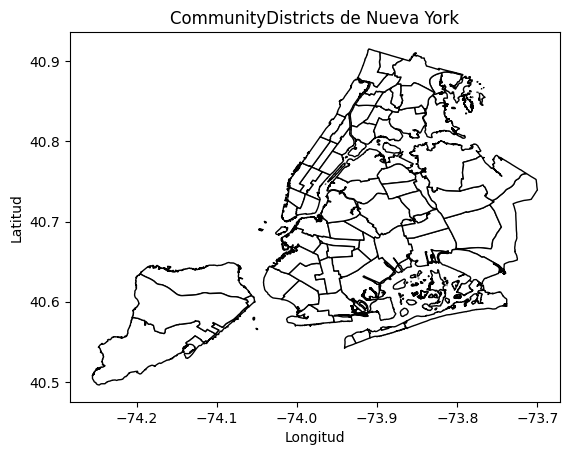

In [94]:
# Crea una figura y ejes
fig, ax = plt.subplots()

# Grafica los datos geoespaciales
boroughs3.plot(ax=ax, color='white', edgecolor='black')

# Añade título y etiquetas
ax.set_title('CommunityDistricts de Nueva York')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Muestra el mapa
plt.show()

### Visualizacion Calidad Aire por Distritos Comunitarios (CommunityDistrict) para el período Verano 2021

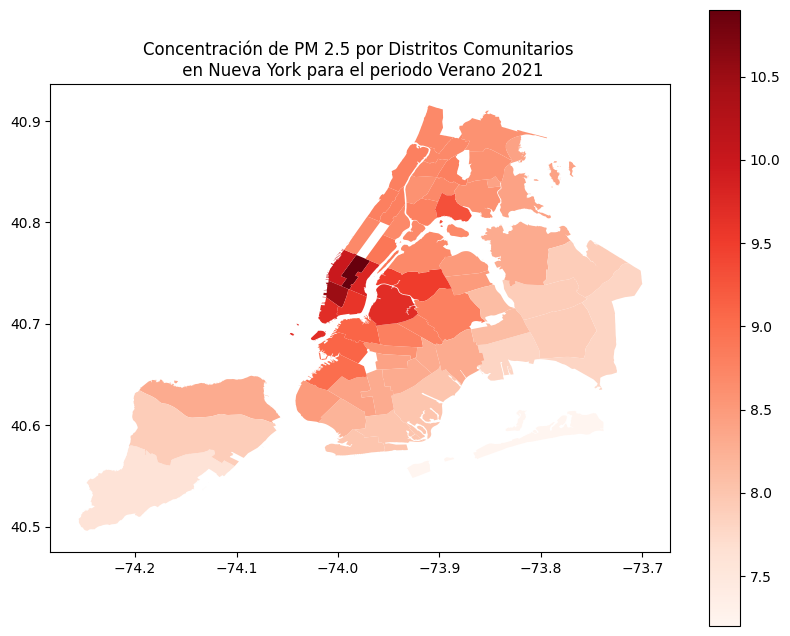

In [115]:
# Combinamos ambos dataframes CommunityDistrict y air_quality_cd_mcgm3_2021_verano

# Fusionar los datos geoespaciales con los datos de concentración utilizando 'IdCD'
cd_concentracion_contaminante_2021 = pd.merge(cd1, air_quality_cd_mcgm3_2021_verano, on="IdLoc")

# Crear un mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))
cd_concentracion_contaminante_2021.plot(column="data_value", cmap="Reds", ax=ax, legend=True)
ax.set_title('Concentración de PM 2.5 por Distritos Comunitarios \n en Nueva York para el periodo Verano 2021')
plt.show()

## Por otro lado nos interesa el año 2020

In [105]:
air_quality_cd_mcgm3


,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
10,2022-06-01,Fine particles (PM 2.5),mcg/m3,6.3,412,2022
11,2022-06-01,Fine particles (PM 2.5),mcg/m3,8.0,104,2022
20,2022-06-01,Fine particles (PM 2.5),mcg/m3,5.8,313,2022
43,2022-06-01,Fine particles (PM 2.5),mcg/m3,6.0,410,2022
44,2022-06-01,Fine particles (PM 2.5),mcg/m3,6.0,311,2022
...,...,...,...,...,...,...
16063,2009-06-01,Fine particles (PM 2.5),mcg/m3,9.7,413,2009
16069,2009-06-01,Fine particles (PM 2.5),mcg/m3,10.7,305,2009
16072,2009-06-01,Fine particles (PM 2.5),mcg/m3,13.0,102,2009
16076,2009-06-01,Fine particles (PM 2.5),mcg/m3,11.5,202,2009


In [106]:
# Nos interesa el año 2020
air_quality_cd_mcgm3_2020 = air_quality_cd_mcgm3[air_quality_cd_mcgm3['Año'] == 2020]
air_quality_cd_mcgm3_2020

,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
1696,2020-12-01,Fine particles (PM 2.5),mcg/m3,6.7,314,2020
1697,2020-12-01,Fine particles (PM 2.5),mcg/m3,6.5,318,2020
1700,2020-12-01,Fine particles (PM 2.5),mcg/m3,6.6,412,2020
1701,2020-12-01,Fine particles (PM 2.5),mcg/m3,6.8,401,2020
1702,2020-12-01,Fine particles (PM 2.5),mcg/m3,7.8,101,2020
...,...,...,...,...,...,...
2655,2020-01-01,Fine particles (PM 2.5),mcg/m3,6.1,207,2020
2658,2020-01-01,Fine particles (PM 2.5),mcg/m3,5.8,410,2020
2659,2020-01-01,Fine particles (PM 2.5),mcg/m3,6.4,110,2020
2674,2020-01-01,Fine particles (PM 2.5),mcg/m3,6.3,407,2020


In [107]:
air_quality_cd_mcgm3_2020['FechaInicio'].unique()

<DatetimeArray>
['2020-12-01 00:00:00', '2020-06-01 00:00:00', '2020-01-01 00:00:00']
Length: 3, dtype: datetime64[ns]

In [109]:
# Nos interesa el periodo Verano de 2020
air_quality_cd_mcgm3_2020_verano = air_quality_cd_mcgm3_2020[air_quality_cd_mcgm3_2020['FechaInicio'] == '2020-06-01']
air_quality_cd_mcgm3_2020_verano.head(5)

,FechaInicio,Contaminante,measure_info,data_value,IdLoc,Año
1985,2020-06-01,Fine particles (PM 2.5),mcg/m3,7.3,302,2020
1988,2020-06-01,Fine particles (PM 2.5),mcg/m3,6.6,413,2020
1990,2020-06-01,Fine particles (PM 2.5),mcg/m3,6.6,502,2020
1994,2020-06-01,Fine particles (PM 2.5),mcg/m3,7.3,304,2020
2013,2020-06-01,Fine particles (PM 2.5),mcg/m3,7.0,308,2020


In [110]:
air_quality_cd_mcgm3_2020_verano['IdLoc'] = air_quality_cd_mcgm3_2020_verano['IdLoc'].astype(int)

C:\Users\cquir\AppData\Local\Temp\ipykernel_2948\1982811161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_cd_mcgm3_2020_verano['IdLoc'] = air_quality_cd_mcgm3_2020_verano['IdLoc'].astype(int)


In [111]:
# Ruta al archivo TopoJSON
file_path = "../datasets/processed/CommunityDistricts.topojson"

# Lee el archivo TopoJSON
cd2 = gpd.read_file(file_path)
cd2 = cd2.rename(columns={'IdCD': 'IdLoc'})
cd2

,id,shape_area,shape_leng,IdLoc,geometry
0,None,4.560379e+07,38232.886649,308,"MULTIPOLYGON (((-73.95829 40.67983, -73.95596 ..."
1,None,1.955766e+08,210918.174933,414,"MULTIPOLYGON (((-73.90972 40.56529, -73.90973 ..."
2,None,5.552214e+07,31358.450899,204,"MULTIPOLYGON (((-73.90269 40.84458, -73.90271 ..."
3,None,9.293810e+07,122141.652229,228,"MULTIPOLYGON (((-73.77322 40.86079, -73.77326 ..."
4,None,3.831698e+07,29443.048118,205,"MULTIPOLYGON (((-73.89138 40.86170, -73.89142 ..."
...,...,...,...,...,...
66,None,1.142848e+08,62243.635685,209,"MULTIPOLYGON (((-73.83979 40.83562, -73.83967 ..."
67,None,1.003151e+08,45751.648332,211,"MULTIPOLYGON (((-73.82834 40.86089, -73.82843 ..."
68,None,3.143088e+07,28402.495160,227,"MULTIPOLYGON (((-73.87054 40.86967, -73.87053 ..."
69,None,1.554832e+08,65091.132825,305,"MULTIPOLYGON (((-73.86841 40.69473, -73.86868 ..."


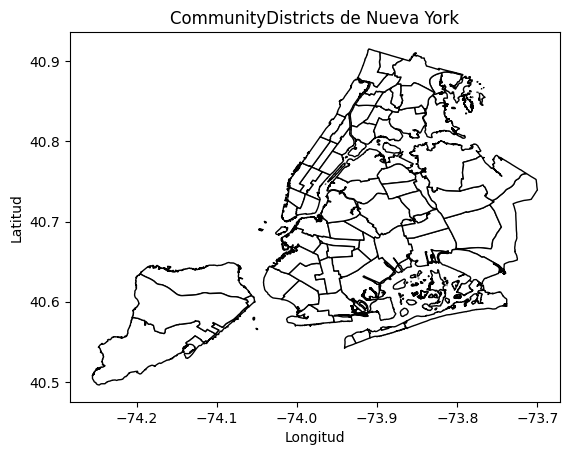

In [112]:
# Crea una figura y ejes
fig, ax = plt.subplots()

# Grafica los datos geoespaciales
cd2.plot(ax=ax, color='white', edgecolor='black')

# Añade título y etiquetas
ax.set_title('CommunityDistricts de Nueva York')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Muestra el mapa
plt.show()

### Visualizacion Calidad Aire por Distritos Comunitarios (CommunityDistrict) para el período Verano 2020

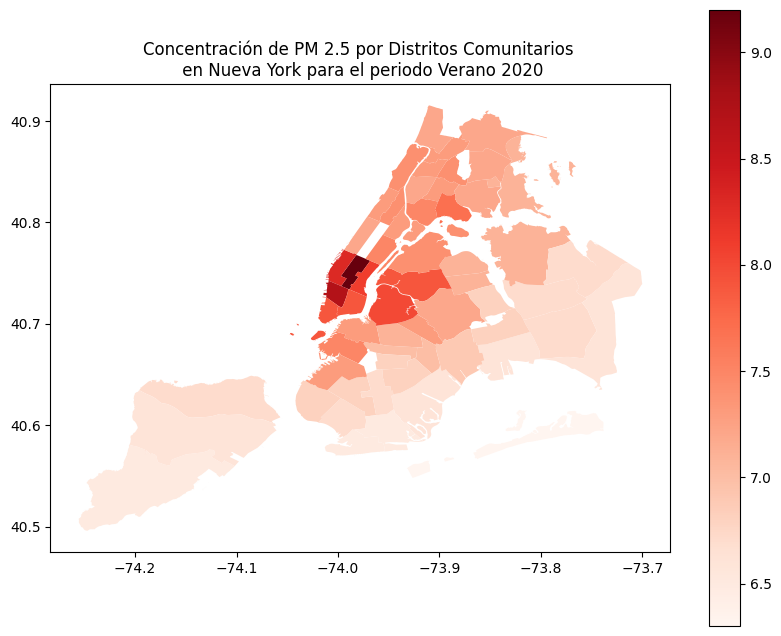

In [116]:
# Combinamos ambos dataframes CommunityDistrict y air_quality_cd_mcgm3_2020_verano

# Fusionar los datos geoespaciales con los datos de concentración utilizando 'IdCD'
cd_concentracion_contaminante_2020 = pd.merge(cd2, air_quality_cd_mcgm3_2020_verano, on="IdLoc")

# Crear un mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))
cd_concentracion_contaminante_2020.plot(column="data_value", cmap="Reds", ax=ax, legend=True)
ax.set_title('Concentración de PM 2.5 por Distritos Comunitarios \n en Nueva York para el periodo Verano 2020')
plt.show()

## EDA de dataset de Emisiones CO2 procesado

In [1]:
import pandas as pd
from datetime import date, time
import zipfile
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [6]:
ruta_archivo2 = '../../datasets/processed/acustic_usa.parquet'

# Se abre el archivo parquet
tabla_parquet2 = pq.read_table(ruta_archivo2)

# Se convierte a dataframe de pandas
acustic_usa = tabla_parquet2.to_pandas()

In [7]:
acustic_usa

,latitude,longitude,year,hour,1-3_large-sounding-engine_presence,1_engine_presence,7_human-voice_presence,2_machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,sensor_id,annotator_id
0,40.72951,-73.99388,2019,8,-1,-1,-1,1,-1,-1,-1,0,-6
1,40.72951,-73.99388,2019,8,1,1,-1,-1,-1,-1,-1,0,-4
2,40.72951,-73.99388,2019,8,0,1,-1,-1,-1,-1,-1,0,-3
3,40.72951,-73.99388,2019,8,-1,-1,-1,0,-1,-1,-1,0,-1
4,40.72951,-73.99388,2019,8,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62017,40.73365,-73.98879,2018,19,0,0,0,0,0,1,0,46,5399
62018,40.73365,-73.98879,2018,19,0,0,1,0,0,1,0,46,5424
62019,40.73365,-73.98879,2018,9,0,0,1,0,0,0,0,46,5337
62020,40.73365,-73.98879,2018,9,0,0,0,0,0,0,0,46,5365


In [8]:
acustic_usa['1-3_large-sounding-engine_presence'].unique()

array([-1,  1,  0], dtype=int64)

In [ ]:
# Columnas que no sirven
eliminar_columnas = ['7_human-voice_presence']

## EDA de dataset de Temperatura procesado

In [9]:
ruta_archivo3 = '../../datasets/processed/temperature.parquet'

# Se abre el archivo parquet
tabla_parquet3 = pq.read_table(ruta_archivo3)

# Se convierte a dataframe de pandas
temperatura = tabla_parquet3.to_pandas()

In [15]:
temperatura.columns

Index(['date', 'temperature_2m'], dtype='object')

In [17]:
temperatura['fecha'] = temperatura['date'].dt.date
temperatura['hora'] = temperatura['date'].dt.time

temperatura.drop(['date'], axis=1, inplace=True)
temperatura

,temperature_2m,fecha,hora
0,8.346,2022-01-01,00:00:00
1,9.146,2022-01-01,01:00:00
2,7.996,2022-01-01,02:00:00
3,8.046,2022-01-01,03:00:00
4,7.646,2022-01-01,04:00:00
...,...,...,...
17515,6.396,2023-12-31,19:00:00
17516,6.296,2023-12-31,20:00:00
17517,5.796,2023-12-31,21:00:00
17518,4.396,2023-12-31,22:00:00


In [23]:
temperatura.dtypes

temperature_2m    float32
fecha              object
hora               object
dtype: object

In [26]:
temperatura['fecha'] = pd.to_datetime(temperatura['fecha'])

temperatura['dia'] = temperatura['fecha'].dt.day
temperatura['mes'] = temperatura['fecha'].dt.month
temperatura['año'] = temperatura['fecha'].dt.year

temperatura.drop(['fecha'], axis=1, inplace=True)
temperatura


,temperature_2m,hora,dia,mes,año
0,8.346,00:00:00,1,1,2022
1,9.146,01:00:00,1,1,2022
2,7.996,02:00:00,1,1,2022
3,8.046,03:00:00,1,1,2022
4,7.646,04:00:00,1,1,2022
...,...,...,...,...,...
17515,6.396,19:00:00,31,12,2023
17516,6.296,20:00:00,31,12,2023
17517,5.796,21:00:00,31,12,2023
17518,4.396,22:00:00,31,12,2023


In [30]:
temperatura_agrupado_por_mes_año = temperatura.groupby(['mes', 'año'])['temperature_2m'].mean().reset_index()
temperatura_agrupado_por_mes_año

,mes,año,temperature_2m
0,1,2022,-1.934175
1,1,2023,4.613338
2,2,2022,1.379780
3,2,2023,3.296967
4,3,2022,5.894320
5,3,2023,5.181954
6,4,2022,10.006486
7,4,2023,12.531555
8,5,2022,16.367437
9,5,2023,15.533500


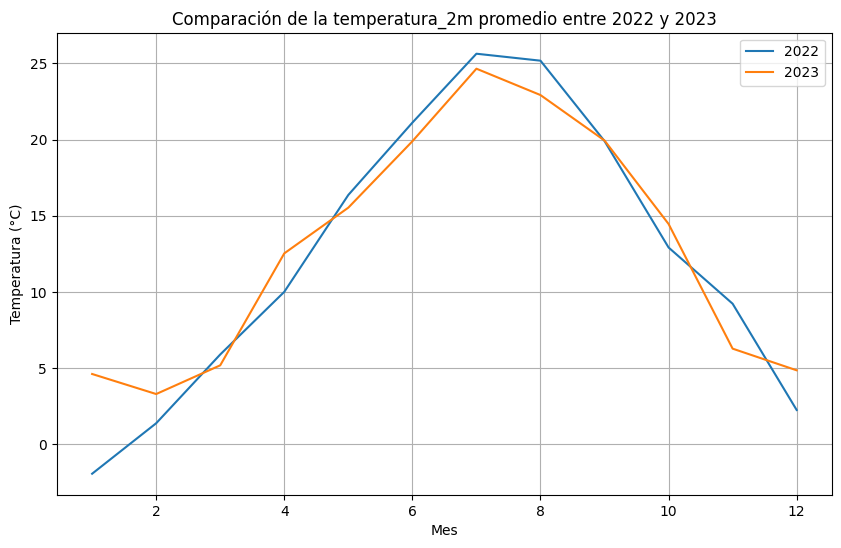

In [32]:
# Filtrar los datos para obtener solo los registros de los años 2022 y 2023
df_2022 = temperatura_agrupado_por_mes_año[temperatura_agrupado_por_mes_año['año'] == 2022]
df_2023 = temperatura_agrupado_por_mes_año[temperatura_agrupado_por_mes_año['año'] == 2023]

# Graficar la variable temperature_2m para ambos años
plt.figure(figsize=(10, 6))
plt.plot(df_2022['mes'], df_2022['temperature_2m'], label='2022')
plt.plot(df_2023['mes'], df_2023['temperature_2m'], label='2023')

# Añadir etiquetas y título al gráfico
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.title('Comparación de la temperatura_2m promedio entre 2022 y 2023')
plt.legend()  # Mostrar leyenda con etiquetas de los años

# Mostrar el gráfico
plt.grid(True)
plt.show()